# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

![bike2.jpg](attachment:bike2.jpg)

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [7]:
data = pd.read_csv(
    "./day.csv",
    usecols=[
        "season",
        "mnth",
        "holiday",
        "weekday",
        "workingday",
        "weathersit",
        "temp",
        "atemp",
        "hum",
        "windspeed",
        "cnt",
    ],
)

In [8]:
data.head()

season  mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
0       1     1        0        6           0           2  0.344167  0.363625   
1       1     1        0        0           0           2  0.363478  0.353739   
2       1     1        0        1           1           1  0.196364  0.189405   
3       1     1        0        2           1           1  0.200000  0.212122   
4       1     1        0        3           1           1  0.226957  0.229270   

        hum  windspeed   cnt  
0  0.805833   0.160446   985  
1  0.696087   0.248539   801  
2  0.437273   0.248309  1349  
3  0.590435   0.160296  1562  
4  0.436957   0.186900  1600

In [9]:
train, test = train_test_split(data, test_size=0.2)

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

* Категориальные: время года, месяц, праздничный ли день, выходной ли день, рабочий ли день, прогноз погоды

* Вещественные: температура, ощущаемая температура, влажность, скорость ветра, количество арендованных велосипедов

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

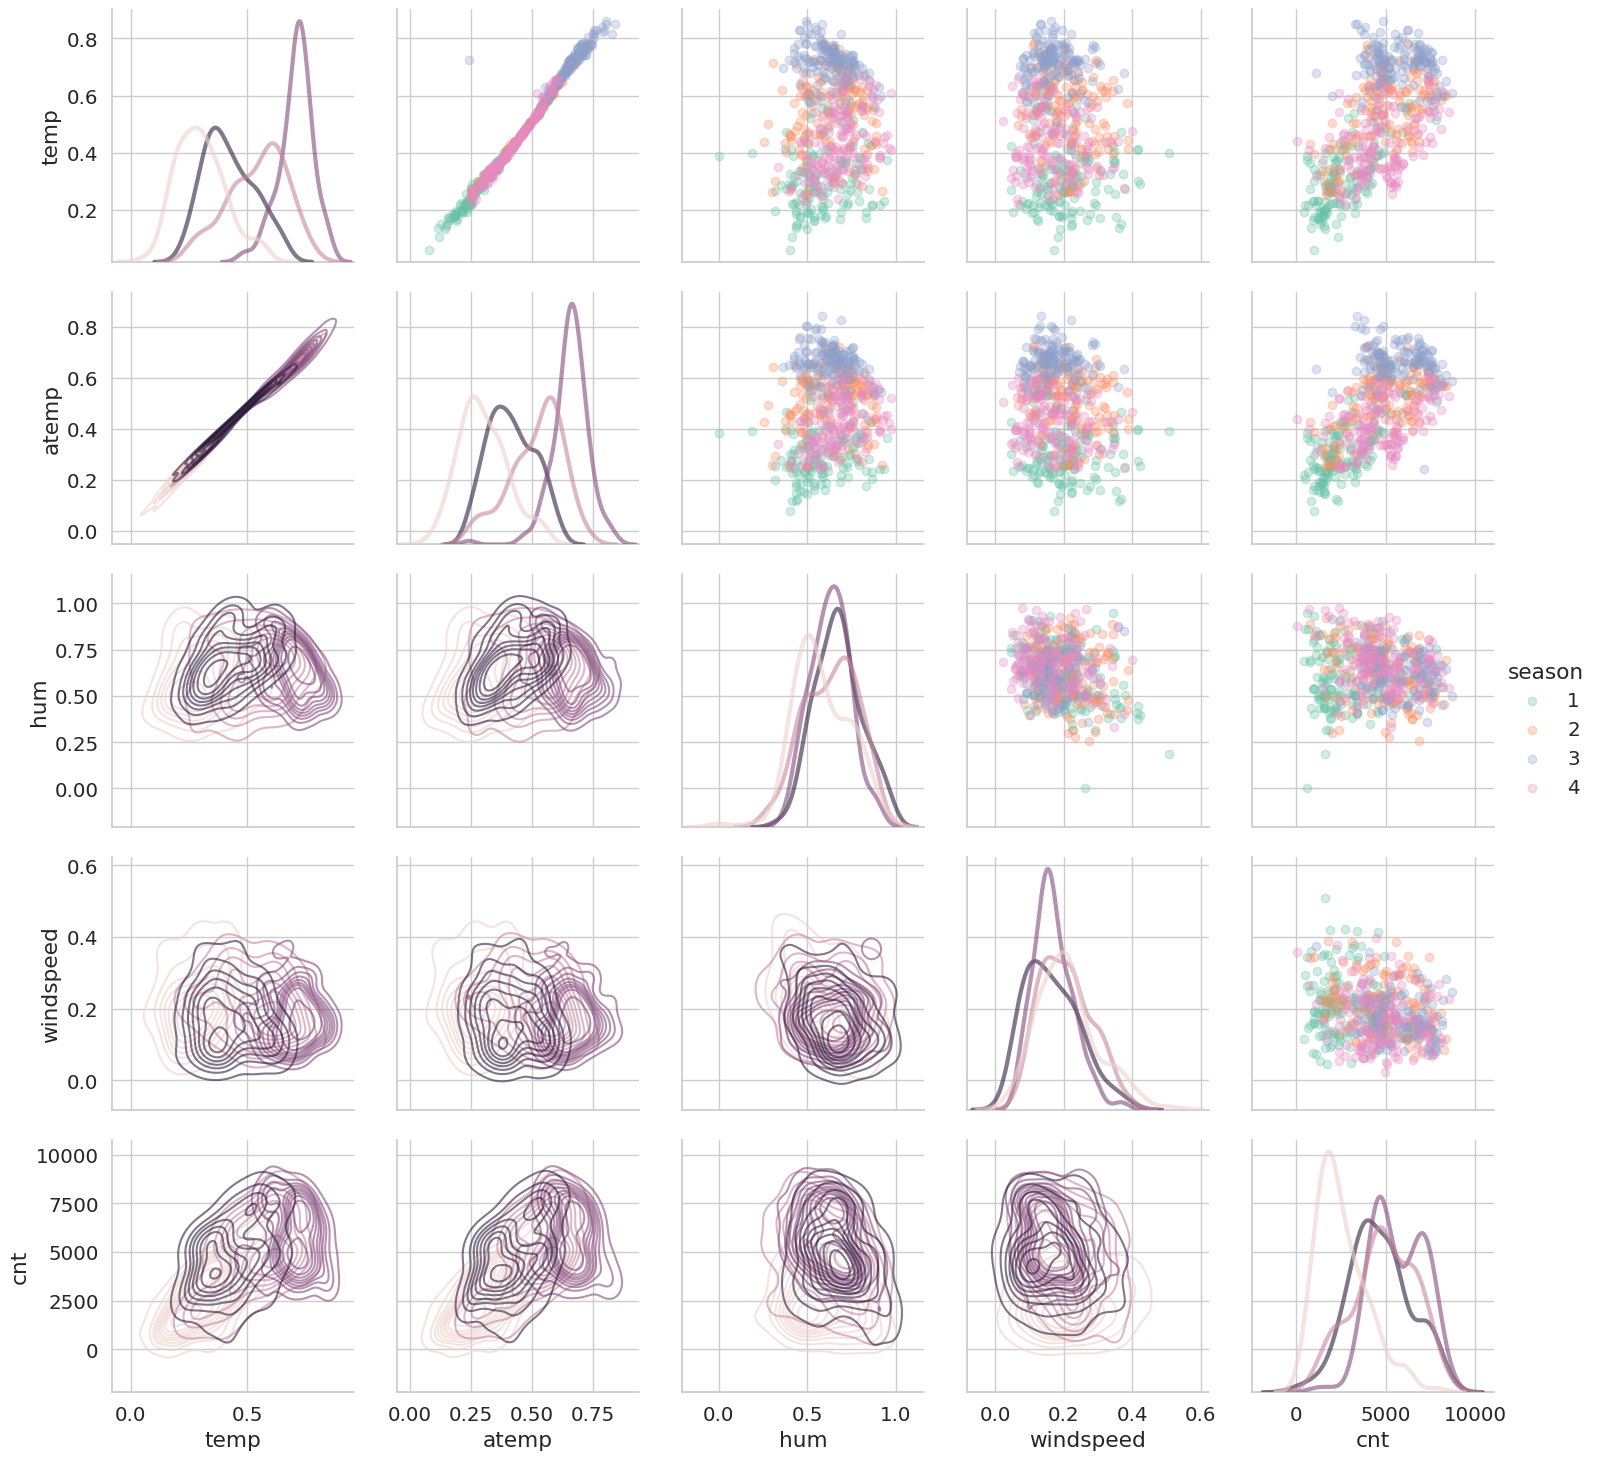

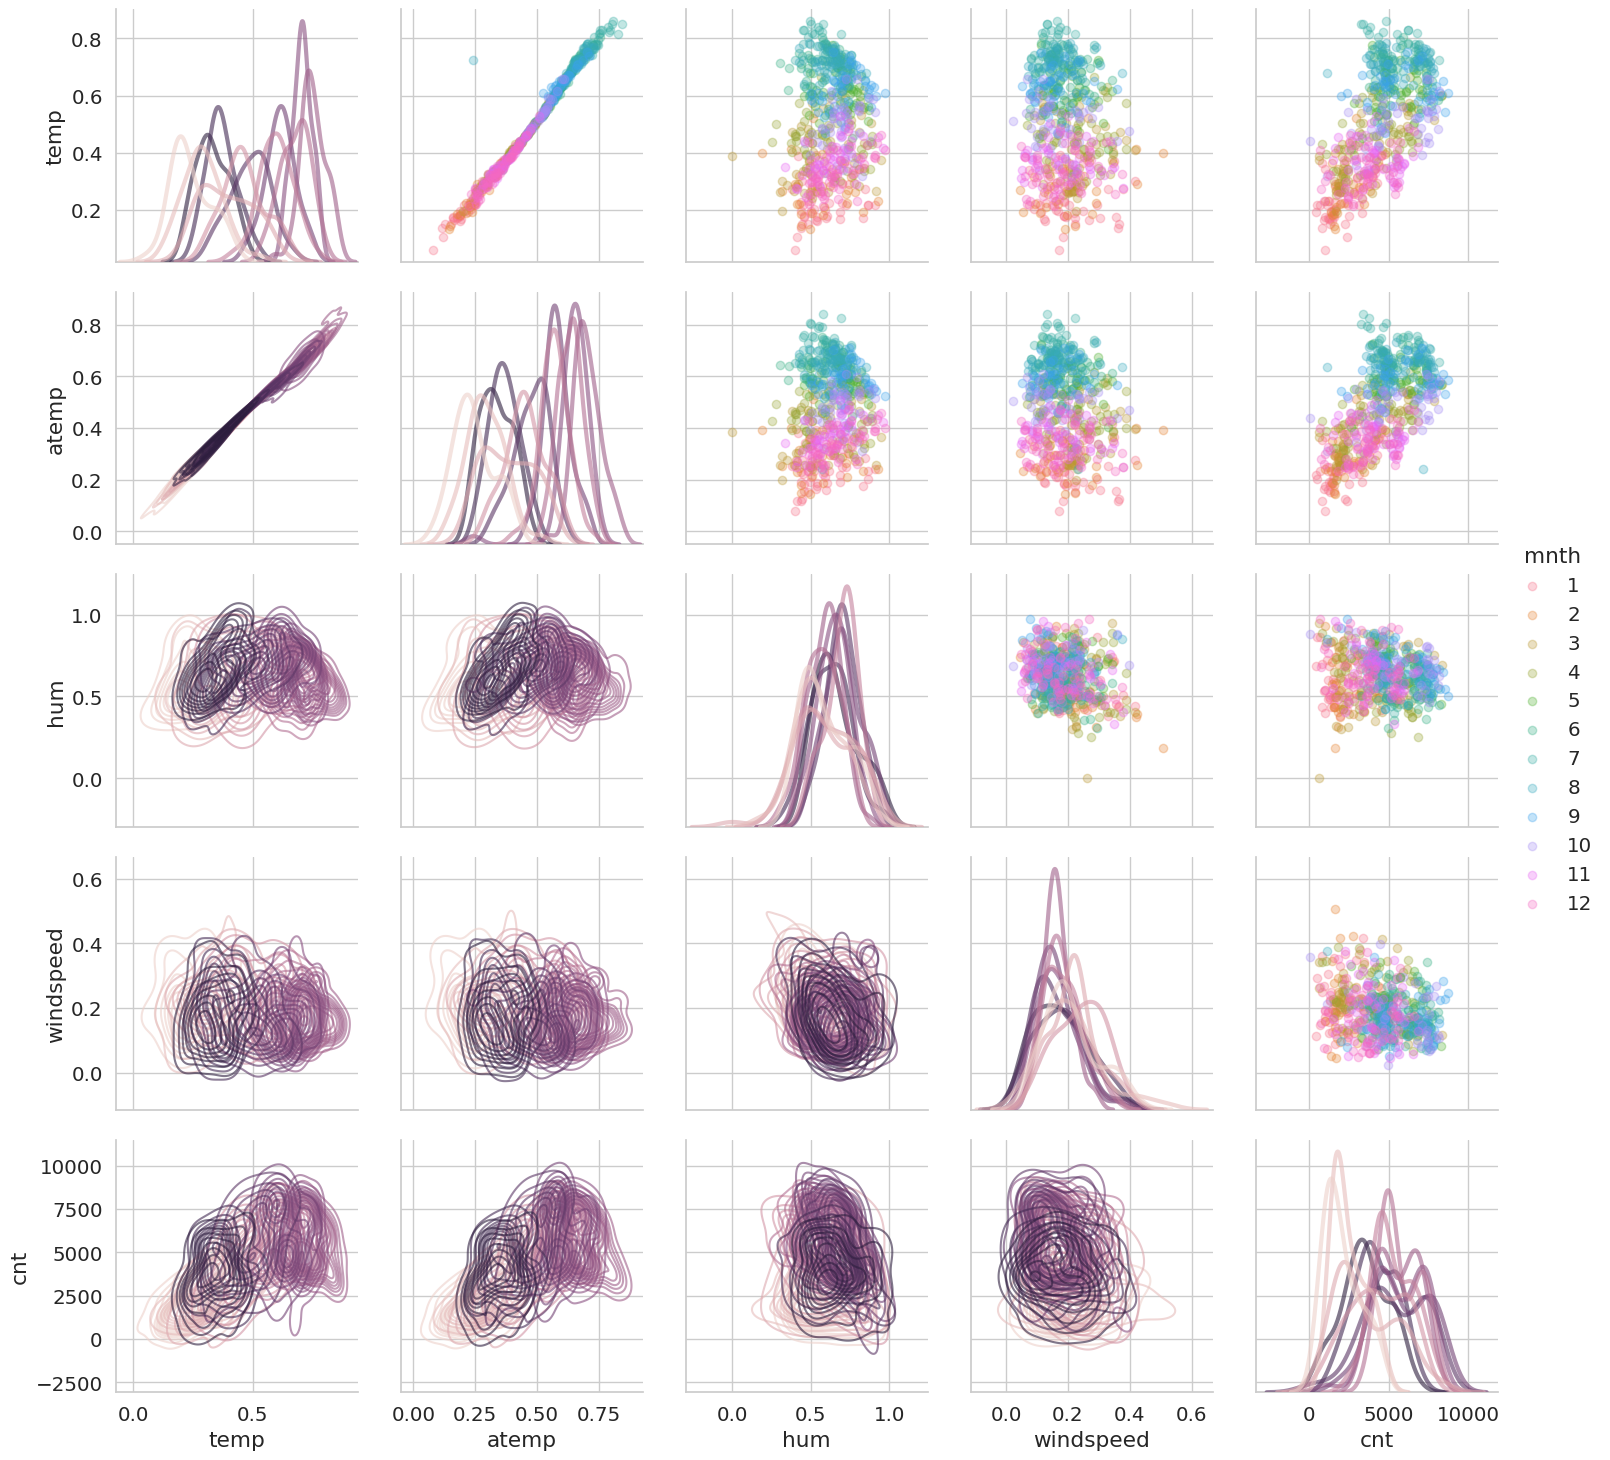

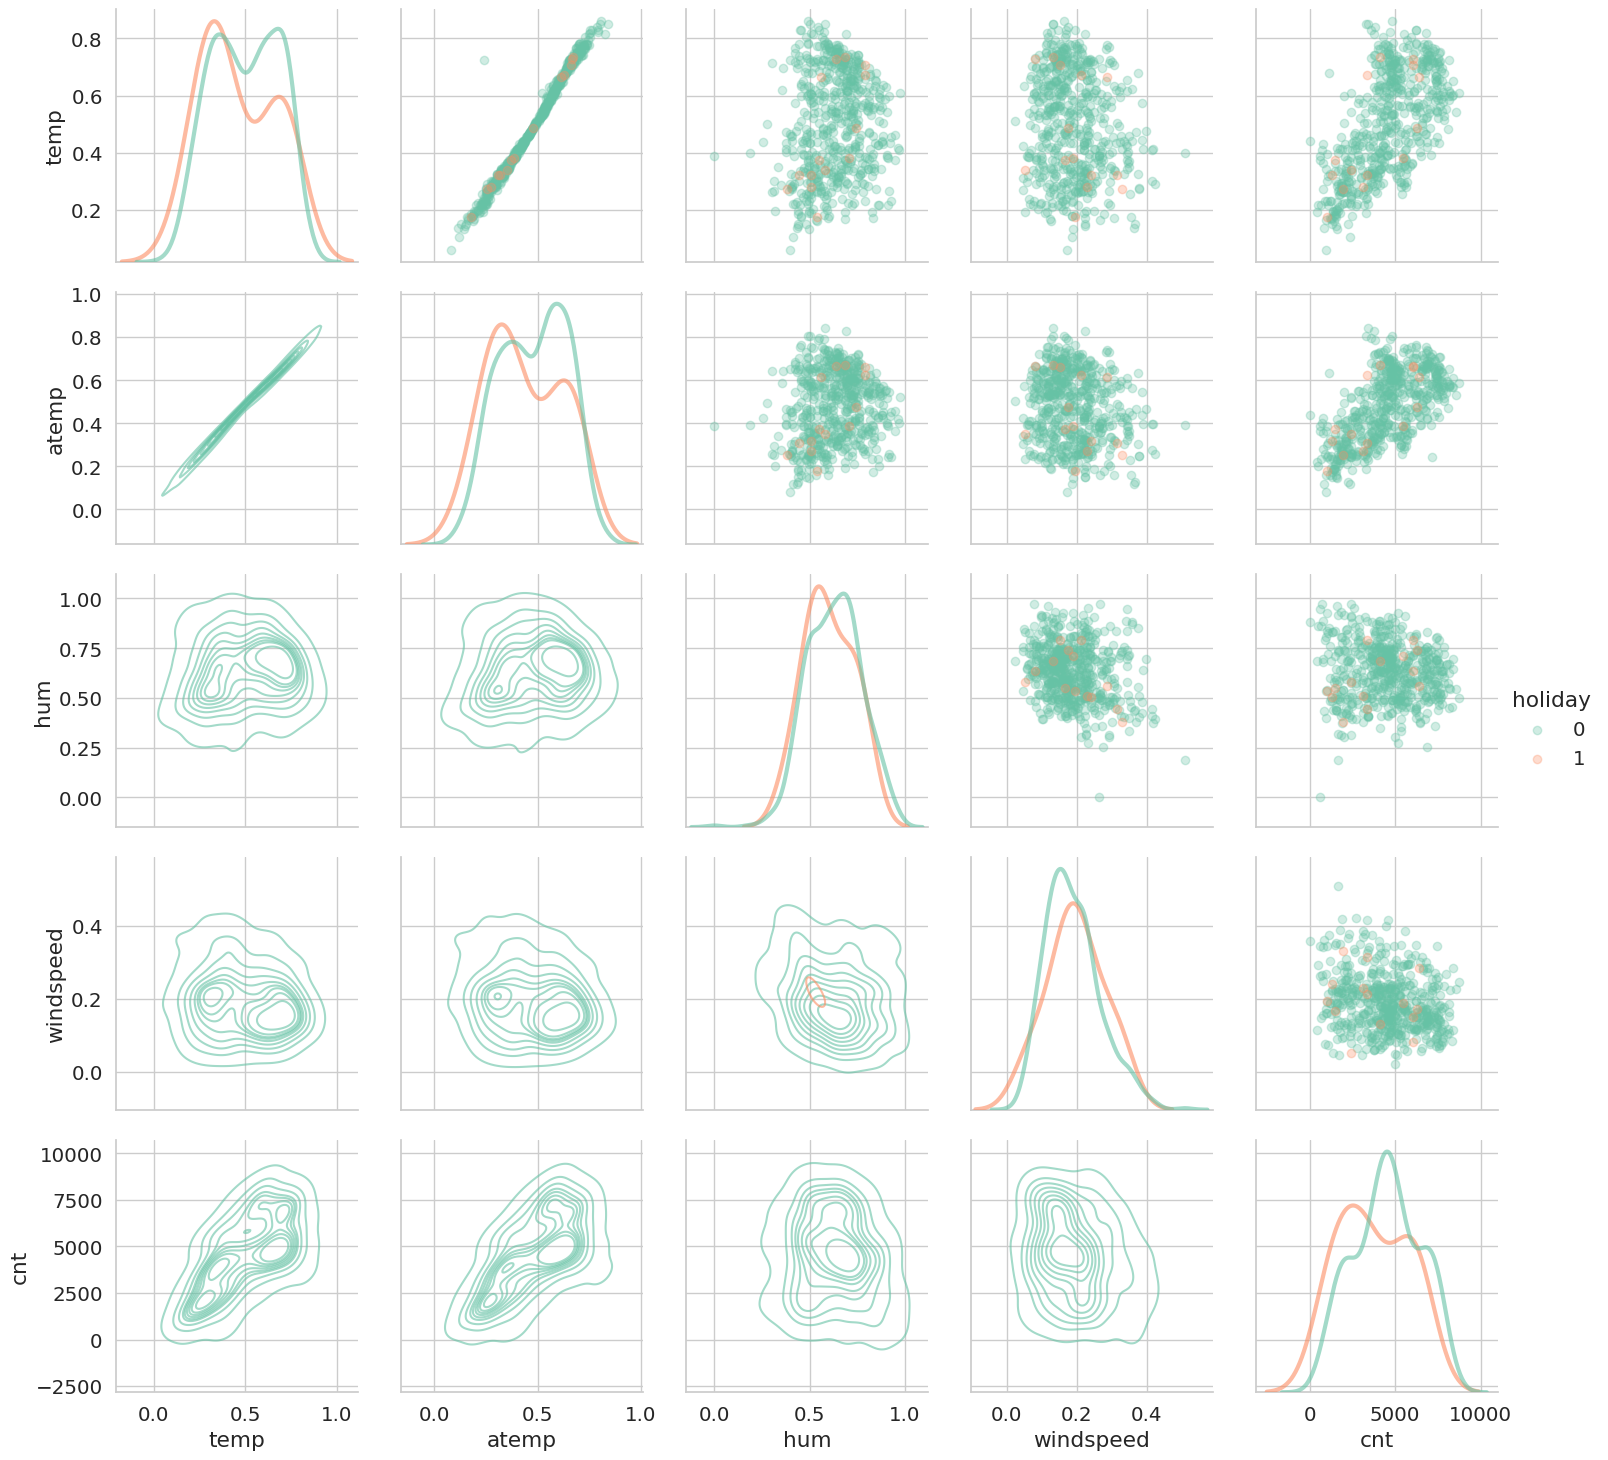

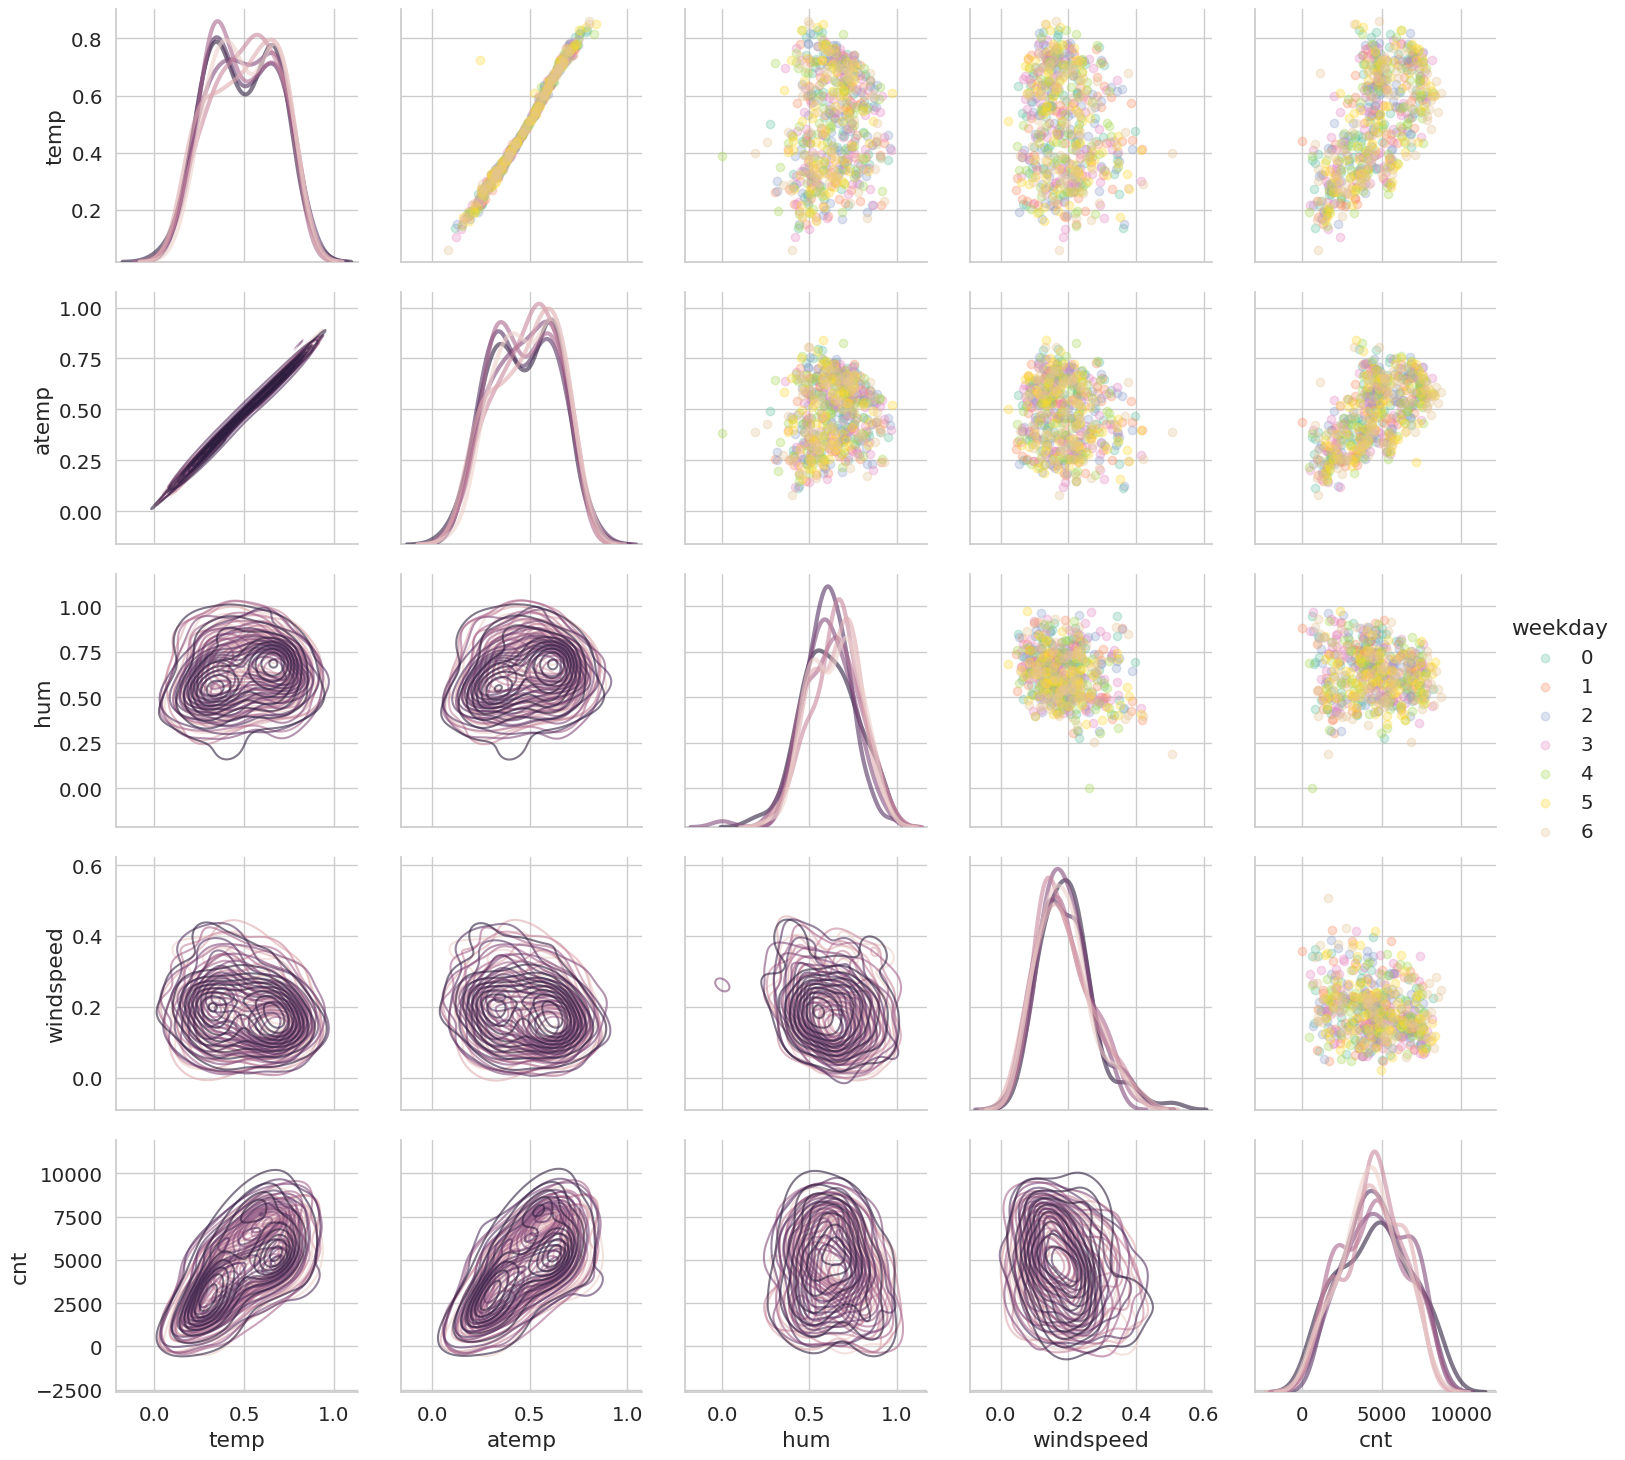

In [10]:
categorial_features = [
    "season",
    "mnth",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
]  # категориальные признаки

for hue in categorial_features:
    g = sns.PairGrid(
        train[["temp", "atemp", "hum", "windspeed", "cnt", hue]],
        hue=hue,
        diag_sharey=False,
        height=3,
    )

    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(
        sns.kdeplot, lw=3, alpha=0.6, common_norm=False
    )  # каждая плотность по отдельности должна давать 1 при интегрировании

    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.

# Выводы:

* Значащими признаками являются сезон, ощущаемая температура, день недели, скорость ветра и прогноз погоды

* В целом наблюдается линейная зависимость количества велосипедов от температуры

* Крайне незначительные выбросы наблюдаются в области зависимости количества арендованных велосипедов от температуры



**Выводы по графикам:**

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

a) Отсекаем незначащие признаки

b) Производим one-hot кодирование категориальных признаков

c) Создаём обучающую выборку (собираем в одну матрицу категориальные и вещественные признаки)

Реализуйте данную процедуру.

In [11]:
categorial_features_meaning = ["season", "weekday", "weathersit"]

In [12]:
encoder = OneHotEncoder(drop="first", sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(
    train[categorial_features_meaning]
)  # обучаем и кодируем

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
train_cat.shape

(584, 11)

In [14]:
real_features = ["atemp", "windspeed"]
target_feature = "cnt"

In [15]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(584, 13)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [16]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])

LinearRegression()

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [17]:
test_cat = encoder.transform(test[categorial_features_meaning])

X_test = np.hstack([test[real_features], test_cat])

In [18]:
test_preds = model.predict(X_test)

metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5  # RMSE

1279.2930144881345

In [19]:
metrics.mean_absolute_error(test[target_feature], test_preds)  # MAE

1125.9762802598736

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [21]:
mean_absolute_percentage_error(test[target_feature], test_preds)  # MAPE

30.2675716921528

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

* Исходя из графиков можем понять, что, например, скорость ветра и температура связаны друг с другом

In [22]:
X = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
np.linalg.inv(X.T @ X + 0.1 * np.eye(X.shape[1])) @ X.T @ train[target_feature]

array([ 6128.23295675, -2278.67246941,  1011.6321361 ,   762.89920218,
        1435.01445566,   332.40751097,   278.7826362 ,   484.5412013 ,
         528.18658068,   552.59273177,   643.47095187,  -676.45952227,
       -2693.47000689,  1106.87537062])

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Сделайте выводы.

**Выводы:**

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

![ubike.png](attachment:ubike.png)

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [23]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit(self, X, Y):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))

        self.theta = (
            np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ X.T @ Y
        )
        return self.theta

    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        predictions = X.dot(self.theta)
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [24]:
train, test = train_test_split(data, test_size=0.4)
test, valid = train_test_split(test, test_size=0.5)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [25]:
encoder = OneHotEncoder(drop="first", sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(
    train[categorial_features_meaning]
)  # обучаем и кодируем
valid_cat = encoder.transform(valid[categorial_features_meaning])

X_train = np.hstack([train[real_features], train_cat])
X_valid = np.hstack([valid[real_features], valid_cat])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
X_test = np.hstack(
    [test[real_features], encoder.transform(test[categorial_features_meaning])]
)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [27]:
lambda_values = np.logspace(base=10, start=-3, stop=10, num=300)

In [28]:
RMSE_train = []
MAE_train = []
MAPE_train = []
weights = []

RMSE_val = []
MAE_val = []
MAPE_val = []

for i in lambda_values:
    reg_model = RidgeRegression(lambd=i)
    weights.append(reg_model.fit(X_train, train[target_feature]))

    train_preds = reg_model.predict(X_train)
    valid_preds = reg_model.predict(X_valid)
    print(f"Lambda  {i:.3f}")
    print("  Metrics for train sample:")
    print(
        f"  RMSE: {metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5}\n  MAE: {metrics.mean_absolute_error(train[target_feature], train_preds)}\n  MAPE: {mean_absolute_percentage_error(train[target_feature], train_preds)}"
    )

    RMSE_train.append(
        metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5
    )  # RMSE
    MAE_train.append(
        metrics.mean_absolute_error(train[target_feature], train_preds)
    )  # MAE
    MAPE_train.append(
        mean_absolute_percentage_error(train[target_feature], train_preds)
    )  # MAPE

    print("Metrics for validation sample:")
    print(
        f"  RMSE: {metrics.mean_squared_error(valid[target_feature], valid_preds) ** 0.5}\n  MAE: {metrics.mean_absolute_error(valid[target_feature], valid_preds)}\n  MAPE: {mean_absolute_percentage_error(valid[target_feature], valid_preds)}"
    )

    RMSE_val.append(
        metrics.mean_squared_error(valid[target_feature], valid_preds) ** 0.5
    )  # RMSE
    MAE_val.append(
        metrics.mean_absolute_error(valid[target_feature], valid_preds)
    )  # MAE
    MAPE_val.append(
        mean_absolute_percentage_error(valid[target_feature], valid_preds)
    )  # MAPE

Lambda  0.001
  Metrics for train sample:
  RMSE: 1311.8090190375187
  MAE: 1121.6755484070372
  MAPE: 31.767232992197332
Metrics for validation sample:
  RMSE: 1341.0409781723642
  MAE: 1151.5749491294027
  MAPE: 100.48001066361734
Lambda  0.001
  Metrics for train sample:
  RMSE: 1311.8090208683486
  MAE: 1121.6762830296732
  MAPE: 31.76733783152666
Metrics for validation sample:
  RMSE: 1341.0425541129782
  MAE: 1151.57633045863
  MAPE: 100.48108468290341
Lambda  0.001
  Metrics for train sample:
  RMSE: 1311.8090231047918
  MAE: 1121.6770949496188
  MAPE: 31.767453703561856
Metrics for validation sample:
  RMSE: 1341.0442961546548
  MAE: 1151.5778571358003
  MAPE: 100.48227175763849
Lambda  0.001
  Metrics for train sample:
  RMSE: 1311.8090258366792
  MAE: 1121.6779922937612
  MAPE: 31.767581768584762
Metrics for validation sample:
  RMSE: 1341.0462218229216
  MAE: 1151.579544443356
  MAPE: 100.48358378458371
Lambda  0.001
  Metrics for train sample:
  RMSE: 1311.809029173726
  MA

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=lambda_values, y=RMSE_train, name="Train"))
fig.add_trace(go.Scatter(x=lambda_values, y=RMSE_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence between lambda and RMSE")
fig.update_xaxes(title="$$\lambda$$", type="log")
fig.update_yaxes(title="RMSE")

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=lambda_values, y=MAE_train, name="Train"))
fig.add_trace(go.Scatter(x=lambda_values, y=MAE_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence between lambda and MAE")
fig.update_xaxes(title="$$\lambda$$", type="log")
fig.update_yaxes(title="RMSE")

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=lambda_values, y=MAPE_train, name="Train"))
fig.add_trace(go.Scatter(x=lambda_values, y=MAPE_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence between lambda and MAPE")
fig.update_xaxes(title="$$\lambda$$", type="log")
fig.update_yaxes(title="RMSE")

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

* Можно заметить, что ошибки начинают возрастать при росте значения λ, особенно сильный рост наблюдается между значениями 1 и 10. Специфический вид графика MAPE объясняется тем, что модель обучена на train.

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [32]:
tr_weights = np.transpose(weights)

In [33]:
fig = go.Figure()
for i in range(0, len(tr_weights)):
    fig.add_trace(
        go.Scatter(x=lambda_values, y=tr_weights[i], name="weight" + str(i))
    )
# fig.add_trace(go.Scatter(x=lambda_values, y=MAPE_val, name='Validation'))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence between lambda and weighs")
fig.update_xaxes(title="$$\lambda$$", type="log")
fig.update_yaxes(title="weifhts")

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Исходя из указанного выше, возьмём λ = 1.


In [34]:
model = RidgeRegression(lambd=1.0)
model.fit(X_train, train[target_feature])
y_pred = model.predict(X_test)
rmse = metrics.mean_squared_error(test[target_feature], y_pred) ** 0.5
mae = metrics.mean_absolute_error(test[target_feature], y_pred)
mape = metrics.mean_absolute_percentage_error(test[target_feature], y_pred)
print(f"RMSE: {rmse}   MAE: {mae}    MAPE: {mape}")

RMSE: 1326.984342578588   MAE: 1135.2005488091315    MAPE: 0.29912084565906233


In [35]:
model = RidgeRegression(lambd=0.0)
model.fit(X_train, train[target_feature])
y_pred = model.predict(X_test)
rmse = metrics.mean_squared_error(test[target_feature], y_pred) ** 0.5
mae = metrics.mean_absolute_error(test[target_feature], y_pred)
mape = metrics.mean_absolute_percentage_error(test[target_feature], y_pred)
print(f"RMSE: {rmse}   MAE: {mae}    MAPE: {mape}")

RMSE: 1323.423009290833   MAE: 1139.4608352792932    MAPE: 0.2978236718157172


Сделайте выводы.

* Переобучение серьёзно ухудшает качество предсказаний

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

![bigdata.jpg](attachment:bigdata.jpg)

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [36]:
theta = np.array([1600.0] + [1000.0] * 28)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [37]:
class SGD:
    def __init__(
        self,
        batch_size=128,
        learning_rate=0.0001,
        lambd=1.0,
        iterations=1500,
        fit_intercept=True,
    ):
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.lambd = lambd
        self.iterations = iterations
        self.fit_intercept = fit_intercept

        self.theta = np.array([1400.0] + [500.0] * 13)

        self.rmse_tr = []
        self.mae_tr = []
        self.mape_tr = []
        self.rmse_val = []
        self.mae_val = []
        self.mape_val = []

    def calc_metrics_train(self, X, y_true):
        y_pred = self.predict(X)

        self.rmse_tr.append(metrics.mean_squared_error(y_true, y_pred) ** 0.5)
        self.mae_tr.append(metrics.mean_absolute_error(y_true, y_pred))
        self.mape_tr.append(
            metrics.mean_absolute_percentage_error(y_true, y_pred)
        )

    def calc_metrics_val(self, X, y_true):
        y_pred = self.predict(X)

        self.rmse_val.append(metrics.mean_squared_error(y_true, y_pred) ** 0.5)
        self.mae_val.append(metrics.mean_absolute_error(y_true, y_pred))
        self.mape_val.append(
            metrics.mean_absolute_percentage_error(y_true, y_pred)
        )

    def step(self, X, y):
        rand_ids = np.random.choice(
            np.arange(0, X_train.shape[0]), self.batch_size, replace=True
        )
        X_batch = X[rand_ids, :]
        y_batch = y[rand_ids]

        if self.fit_intercept:
            X_batch = np.hstack((X_batch, np.ones((X_batch.shape[0], 1))))

        self.theta -= self.theta * (
            (self.lambd * self.learning_rate * X.shape[0]) / self.batch_size
        ) + self.learning_rate * (X_batch.T @ (X_batch @ self.theta - y_batch))

    def fit(self, X_train, y_train, X_val, y_val):
        self.calc_metrics_train(X_train, y_train)
        self.calc_metrics_val(X_val, y_val)

        for i in range(self.iterations):
            self.step(X_train, y_train)

            self.calc_metrics_train(X_train, y_train)
            self.calc_metrics_val(X_val, y_val)
        return self

    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        predictions = X.dot(self.theta)
        return predictions

In [38]:
model = SGD(iterations=5000)
model.fit(
    X_train,
    np.asarray(train[target_feature]),
    X_valid,
    np.asarray(valid[target_feature]),
)

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

* Потребовалось около 2000 итераций

In [39]:
iters = np.arange(0, 5000)

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=iters, y=model.rmse_tr, name="Train"))
fig.add_trace(go.Scatter(x=iters, y=model.rmse_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence number of iterations and RMSE")
fig.update_yaxes(title="RMSE")

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=iters, y=model.mae_tr, name="Train"))
fig.add_trace(go.Scatter(x=iters, y=model.mae_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence number of iterations and MAE")
fig.update_yaxes(title="MAE")

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=iters, y=model.mape_tr, name="Train"))
fig.add_trace(go.Scatter(x=iters, y=model.mape_val, name="Validation"))
fig.update_layout(legend_orientation="v")
fig.update_layout(title="Dependence number of iterations and MAPE")
fig.update_yaxes(title="MAPE")

Посчитайте ошибку на тестовой выборке.

In [43]:
y_pred = model.predict(X_test)
rmse = metrics.mean_squared_error(test[target_feature], y_pred) ** 0.5
mae = metrics.mean_absolute_error(test[target_feature], y_pred)
mape = metrics.mean_absolute_percentage_error(test[target_feature], y_pred)
print(f"RMSE: {rmse}   MAE: {mae}    MAPE: {mape}")

RMSE: 1463.2108083766254   MAE: 1210.595324595805    MAPE: 0.37302867552458846


Сделайте выводы.

* Важно правильно подобрать гиперпараметры -- значения learning rate и количества итераций могут существенно влиять на сходимость